pip install requests

In [1]:
import requests

In [ ]:
pip install tqdm

In [2]:
payload= {"in_biz_cds" : "0",
"in_scodes" : "0",
"ins_lat" : "37.56682",
"ins_lng" : "126.97865",
"search_text" : "",
"p_sido_cd" : "01",
"p_gugun_cd" : "",
"in_distance" : "0",
"in_biz_cd" : "",
"isError" : "true",
"searchType" : "C",
"set_date" : "",
"all_store" : "0",
"T03" : "0",
"T01" : "0",
"T27" : "0",
"T12" : "0",
"T09" : "0",
"T30" : "0",
"T05" : "0",
"T22" : "0",
"T21" : "0",
"T10" : "0",
"T36" : "0",
"T43" : "0",
"T48" : "0",
"Z9999" : "0",
"P10" : "0",
"P50" : "0",
"P20" : "0",
"P60" : "0",
"P30" : "0",
"P70" : "0",
"P40" : "0",
"P80" : "0",
"whcroad_yn" : "0",
"P90" : "0",
"P01" : "0",
"new_bool" : "0",
"iend" : "1000",
"rndCod" : "EMP6WZ23VQ",}


In [3]:
from tqdm import tqdm

In [68]:
url_cd = "https://www.starbucks.co.kr/store/getSidoList.do"
r = requests.post(url_cd)

In [73]:
r.json()['list'][1]

{'seq': 0,
 'sido_cd': '08',
 'sido_nm': '경기',
 'gugun_cd': None,
 'gugun_nm': None,
 'code_order': None,
 'view_yn': None,
 'store_num': None,
 'sido': None,
 'gugun': None,
 'address': None,
 'new_img_nm': None,
 'p_pro_seq': 0,
 'p_view_yn': None,
 'p_sido_cd': '',
 'p_gugun_cd': '',
 'p_store_nm': None,
 'p_theme_cd': None,
 'p_wireless_yn': None,
 'p_smoking_yn': None,
 'p_book_yn': None,
 'p_music_yn': None,
 'p_terrace_yn': None,
 'p_table_yn': None,
 'p_takeout_yn': None,
 'p_parking_yn': None,
 'p_dollar_assent': None,
 'p_card_recharge': None,
 'p_subway_yn': None,
 'stb_store_file_renew': None,
 'stb_store_theme_renew': None,
 'stb_store_time_renew': None,
 'stb_store_lsm': None,
 's_code': None,
 's_name': None,
 'tel': None,
 'fax': None,
 'sido_code': None,
 'sido_name': None,
 'gugun_code': None,
 'gugun_name': None,
 'addr': None,
 'park_info': None,
 'new_state': None,
 'theme_state': None,
 'new_bool': 0,
 'search_text': '',
 'ins_lat': '',
 'ins_lng': '',
 'in_distan

In [76]:
pd.DataFrame(r.json()['list']).shape

(17, 133)

In [5]:
import requests
import pandas as pd 
url_cd = "https://www.starbucks.co.kr/store/getSidoList.do"
r = requests.post(url_cd)
url_place = "https://www.starbucks.co.kr/store/getStore.do?r=6DKBI0DUO3"

total = []
for x in tqdm(r.json()['list']):
    #print(x['sido_nm'], x['sido_cd'])
    payload['p_sido_cd'] = x['sido_cd']
    r = requests.post(url_place, data=payload)
    total.append(pd.DataFrame(r.json()['list']))
starbuck_df = pd.concat(total)



100%|█████████████████████████████████████████████████████████████| 17/17 [00:05<00:00,  2.98it/s]


In [78]:
starbuck_df.shape

(1887, 133)

In [7]:
starbuck_df['s_name'].unique().size

1887

In [11]:
pd.set_option('display.max_columns', None)

In [13]:
star_df = starbuck_df.loc[:,~(starbuck_df.isnull().sum() > 1800)].copy()

In [14]:
star_df.head()

,seq,p_pro_seq,p_sido_cd,p_gugun_cd,s_code,s_name,tel,fax,sido_code,sido_name,gugun_code,gugun_name,addr,new_state,theme_state,new_bool,search_text,ins_lat,ins_lng,in_distance,out_distance,all_search_cnt,addr_search_cnt,store_search_cnt,rowCount,store_nm,store_cd,s_biz_code,new_icon,set_user,favorites,defaultimage,in_biz_cds,in_scodes,vSal,istart,iend,open_dt,gold_card,ip_lat,ip_long,espresso,new_store,premiere_food,doro_address,cold_blew,my_siren_order_store_yn,whcroad_yn,skuNo,skuName,skuImgUrl,stock_count,store_area_code,lat,lot,t20,t04,t03,t01,t12,t09,t06,t10,p10,p50,p20,p60,p30,p70,p40,p80,t22,t21,p90,p01,t05,t30,t36,t27,t29,t43,t48,z9999
0,0,0,,,1509,역삼아레나빌딩,1522-3232,02-568-3763,01,서울,0101,강남구,서울특별시 강남구 역삼동 721-13 아레나빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T30@@T52@T57@P80...,0,,,,0,9.26,-1,-1,-1,30,,0,3762,N,,0,/upload/store/2020/09/[3762]_20200917031519_6j...,0,0,,1,60,20190613,0,,,,,,서울특별시 강남구 언주로 425 (역삼동),,N,WHCROAD,,,,0,A01,37.501087,127.043069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,,,1434,논현역사거리,1522-3232,02-3442-3673,01,서울,0101,강남구,서울특별시 강남구 논현동 142-2 정일빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T30@T52@T57@P70@...,0,,,,0,7.38,-1,-1,-1,30,,0,3672,N,,0,/upload/store/2018/12/[3672]_20181211120009_t9...,0,0,,1,60,20181123,0,,,,,,서울특별시 강남구 강남대로 538 (논현동),,N,,,,,0,A01,37.510178,127.022223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,,,1595,신사역성일빌딩,1522-3232,02-547-3859,01,서울,0101,강남구,서울특별시 강남구 논현동 18-4 성일빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T30@T34@T36@@T52...,0,,,,0,6.95,-1,-1,-1,30,,0,3858,N,,0,/upload/store/2022/01/[3858]_20220127064243_5k...,0,0,,1,60,20191219,0,,,,,,서울특별시 강남구 강남대로 584 (논현동),,N,,,,,0,A01,37.5139309,127.0206057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,,,1527,국기원사거리,1522-3232,02-568-3669,01,서울,0101,강남구,서울특별시 강남구 역삼동 648-22 동찬빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T30@T32@T34@@T52...,0,,,,0,8.82,-1,-1,-1,30,,0,3669,N,,0,/upload/store/2019/07/[3669]_20190730073527_5n...,0,0,,1,60,20190731,0,,,,,,서울특별시 강남구 테헤란로 125 (역삼동),,N,WHCROAD,,,,0,A01,37.499517,127.031495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,,,1468,대치재경빌딩,1522-3232,02-568-3705,01,서울,0101,강남구,서울특별시 강남구 대치동 599 대원빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T22@T30@T32@T36@...,0,,,,0,10.92,-1,-1,-1,30,,0,3703,N,,0,/upload/store/2023/12/[3703]_20231217121347_eq...,0,0,,1,60,20190214,0,,,,,,서울특별시 강남구 남부순환로 2947 (대치동),,N,WHCROAD,,,,0,A01,37.494668,127.062583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
star_df['DT'] = star_df['s_name'].apply(lambda x : "DT" in x)

In [16]:
star_df

,seq,p_pro_seq,p_sido_cd,p_gugun_cd,s_code,s_name,tel,fax,sido_code,sido_name,gugun_code,gugun_name,addr,new_state,theme_state,new_bool,search_text,ins_lat,ins_lng,in_distance,out_distance,all_search_cnt,addr_search_cnt,store_search_cnt,rowCount,store_nm,store_cd,s_biz_code,new_icon,set_user,favorites,defaultimage,in_biz_cds,in_scodes,vSal,istart,iend,open_dt,gold_card,ip_lat,ip_long,espresso,new_store,premiere_food,doro_address,cold_blew,my_siren_order_store_yn,whcroad_yn,skuNo,skuName,skuImgUrl,stock_count,store_area_code,lat,lot,t20,t04,t03,t01,t12,t09,t06,t10,p10,p50,p20,p60,p30,p70,p40,p80,t22,t21,p90,p01,t05,t30,t36,t27,t29,t43,t48,z9999,DT
0,0,0,,,1509,역삼아레나빌딩,1522-3232,02-568-3763,01,서울,0101,강남구,서울특별시 강남구 역삼동 721-13 아레나빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T30@@T52@T57@P80...,0,,,,0,9.26,-1,-1,-1,30,,0,3762,N,,0,/upload/store/2020/09/[3762]_20200917031519_6j...,0,0,,1,60,20190613,0,,,,,,서울특별시 강남구 언주로 425 (역삼동),,N,WHCROAD,,,,0,A01,37.501087,127.043069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
1,0,0,,,1434,논현역사거리,1522-3232,02-3442-3673,01,서울,0101,강남구,서울특별시 강남구 논현동 142-2 정일빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T30@T52@T57@P70@...,0,,,,0,7.38,-1,-1,-1,30,,0,3672,N,,0,/upload/store/2018/12/[3672]_20181211120009_t9...,0,0,,1,60,20181123,0,,,,,,서울특별시 강남구 강남대로 538 (논현동),,N,,,,,0,A01,37.510178,127.022223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,0,0,,,1595,신사역성일빌딩,1522-3232,02-547-3859,01,서울,0101,강남구,서울특별시 강남구 논현동 18-4 성일빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T30@T34@T36@@T52...,0,,,,0,6.95,-1,-1,-1,30,,0,3858,N,,0,/upload/store/2022/01/[3858]_20220127064243_5k...,0,0,,1,60,20191219,0,,,,,,서울특별시 강남구 강남대로 584 (논현동),,N,,,,,0,A01,37.5139309,127.0206057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
3,0,0,,,1527,국기원사거리,1522-3232,02-568-3669,01,서울,0101,강남구,서울특별시 강남구 역삼동 648-22 동찬빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T30@T32@T34@@T52...,0,,,,0,8.82,-1,-1,-1,30,,0,3669,N,,0,/upload/store/2019/07/[3669]_20190730073527_5n...,0,0,,1,60,20190731,0,,,,,,서울특별시 강남구 테헤란로 125 (역삼동),,N,WHCROAD,,,,0,A01,37.499517,127.031495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,0,0,,,1468,대치재경빌딩,1522-3232,02-568-3705,01,서울,0101,강남구,서울특별시 강남구 대치동 599 대원빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T22@T30@T32@T36@...,0,,,,0,10.92,-1,-1,-1,30,,0,3703,N,,0,/upload/store/2023/12/[3703]_20231217121347_eq...,0,0,,1,60,20190214,0,,,,,,서울특별시 강남구 남부순환로 2947 (대치동),,N,WHCROAD,,,,0,A01,37.494668,127.062583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0,0,,,2146,세종반곡,1522-3232,044-862-4430,17,세종,1701,None,"세종특별자치시 반곡동 41-17 105호,106호,107호,108호,204호,205...",None,T05@T08@T16@T17@T20@T21@T30@T32@T34@T48@T51@T5...,0,,,,0,122.45,-1,-1,-1,30,,0,4429,N,,0,/upload/store/2023/08/[4429]_20230816054209_d3...,0,0,,1,60,20230622,0,,,,,,세종특별자치시 한누리대로 1844 (반곡동),,N,,,,,0,A05,36.4978562567888,127.31004736092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
10,0,0,,,2041,세종한솔,1522-3232,044-866-4342,17,세종,1701,None,세종특별자치시 한솔동 968 공원빌딩,None,T20@T21@T30@T32@T34@T36@T43@T48@T52@T60@T09,0,,,,0,123.29,-1,-1,-1,30,,0,4343,N,,0,/upload/store/2022/09/[4343]_20220928094927_h7...,0,0,,1,60,20220929,0,,,,,,세종특별자치시 노을3로 101 (한솔동),,N,,,,,0,A05,36.479955,127.253348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
11,0,0,,,1750,세종소담,1522-3232,044-862-3977,17,세종,1701,None,"세종특별자치시 소담동 539 새샘마을7단지 근린생활시설 -1동 12호,13호,14호...",None,T05@T08@T16@T17@T20@T21@T30@T32@T34@@T48@T52@T...,0,,,,0,123.56,-1,-1,-1,30,,0,3976,N,,0,/upload/store/2021/01/[3976]_20210110113241_t1...,0,0,,1,60,20210115,0,,,,,,"세종특별자치시 소담3로 8 (소담동) 1동 12호,13호,14호,15호,15a호,16호",,N,,,,,0,A05,36.4

In [19]:
star_df.groupby('sido_name')['DT'].sum().sort_values()

sido_name
세종       2
강원도      5
강원      11
충북      12
울산      14
전남      14
제주      16
대전      17
충남      17
전북      20
인천      22
서울      23
경북      27
광주      27
경남      28
부산      28
대구      30
경기     134
Name: DT, dtype: int64

In [21]:
star_df['open_dt'] = pd.to_datetime(star_df['open_dt'])

In [22]:
star_df['open_dt']

0    2019-06-13
1    2018-11-23
2    2019-12-19
3    2019-07-31
4    2019-02-14
        ...    
9    2023-06-22
10   2022-09-29
11   2021-01-15
12   2023-11-17
13   2021-06-09
Name: open_dt, Length: 1887, dtype: datetime64[ns]

In [27]:
# 'open_dt' 칼럼에서 월 정보를 추출하여 새로운 'month' 칼럼을 추가
star_df['month'] = pd.to_datetime(star_df['open_dt']).dt.month

star_df['year'] = pd.to_datetime(star_df['open_dt']).dt.year

star_df['day'] = pd.to_datetime(star_df['open_dt']).dt.day

In [26]:
star_df['month'].value_counts()

month
12    201
6     184
9     173
4     171
8     166
3     156
7     148
1     148
11    146
5     139
10    138
2     117
Name: count, dtype: int64

In [29]:
star_df['day'].value_counts()[:5]

day
29    120
28    111
30     98
23     87
25     84
Name: count, dtype: int64

In [31]:
star_df['year'].value_counts()[:5]

year
2022    165
2021    158
2020    149
2017    149
2023    148
Name: count, dtype: int64

In [32]:
# 'open_dt'에서 연도와 월 정보를 추출하여 'year_month' 칼럼 추가
star_df['year_month'] = pd.to_datetime(star_df['open_dt']).dt.to_period('M')

In [33]:
star_df['year_month'].value_counts()

year_month
2018-06    24
2016-12    23
2022-04    20
2019-12    20
2023-11    19
           ..
2009-05     1
2001-03     1
2001-11     1
2007-01     1
2003-11     1
Freq: M, Name: count, Length: 247, dtype: int64

In [34]:
star_df['open_dt'] = pd.to_datetime(star_df['open_dt'])
star_df['open'] = star_df['open_dt'].apply(lambda x : f"{x.year}-{x.month}-01")
star_series = star_df.groupby('open', as_index=False)[['s_name']].count()


In [35]:
star_series

,open,s_name
0,1999-7-01,1
1,2000-10-01,1
2,2001-11-01,1
3,2001-12-01,4
4,2001-3-01,1
...,...,...
242,2023-5-01,13
243,2023-6-01,10
244,2023-7-01,13
245,2023-8-01,10


In [36]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


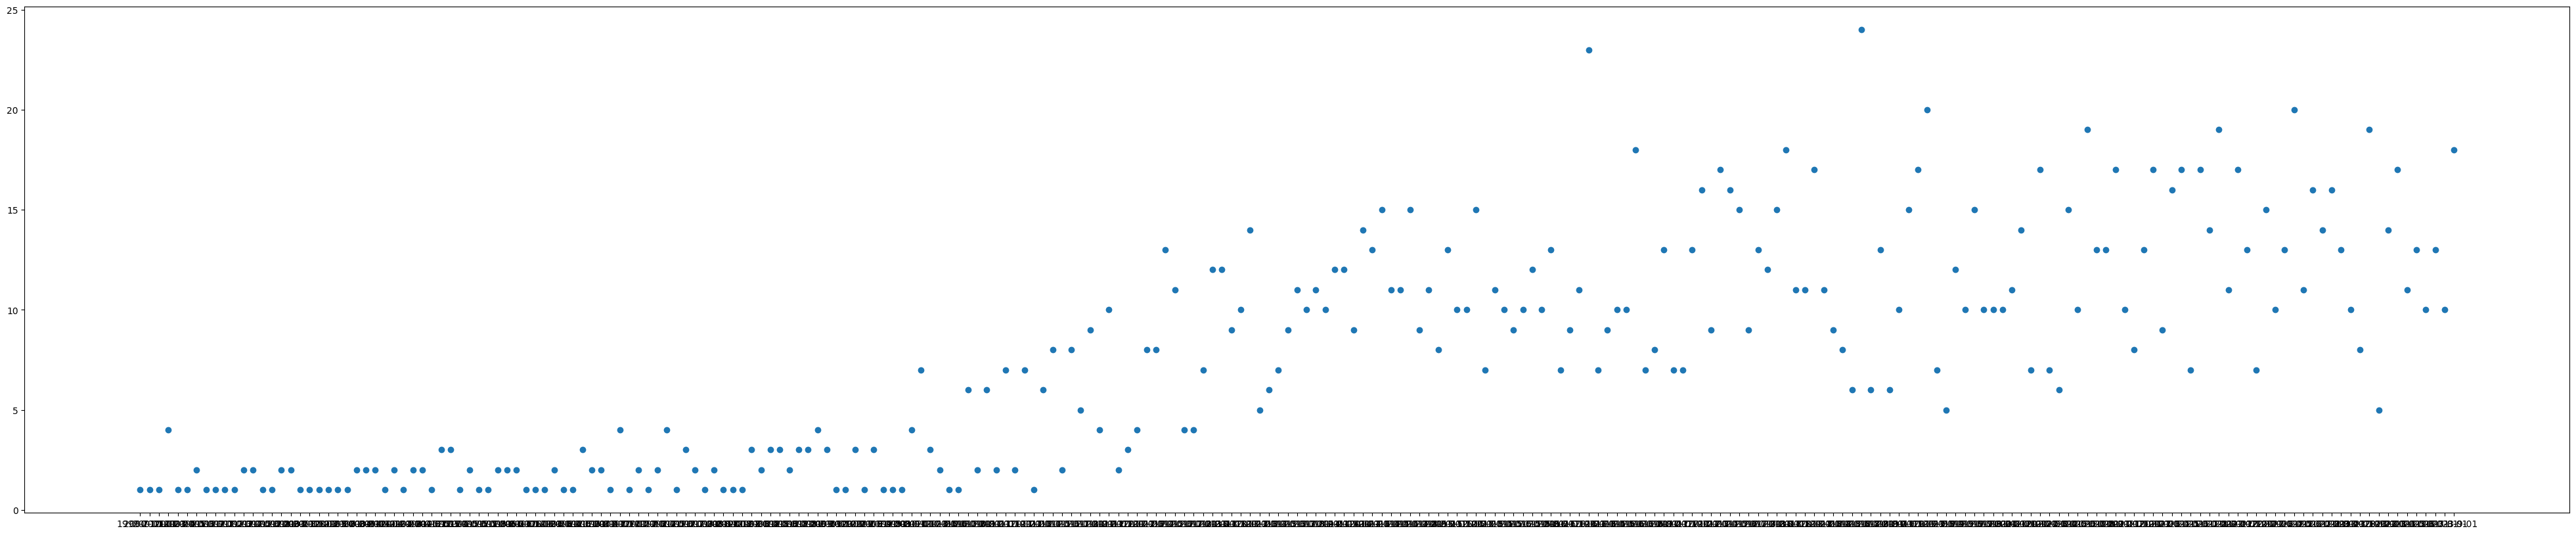

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50,10))
plt.scatter(star_series['open'], star_series['s_name'])
plt.show()

In [67]:
from urllib import request
import os 
if os.path.isdir("./starbucks") == False:
    os.mkdir("./starbucks")
image_url = "https://www.starbucks.co.kr"
for idx, row in star_df.iterrows():
    img = row['defaultimage']
    request.urlretrieve(image_url + img, f"./starbucks/{row['defaultimage'].split('/')[-1]}")

